## Comparison between LDA and FastText to identify similar documents from training set 

In [20]:
from Model import Model
from Validation import Validation
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from gensim.models.fasttext import FastText as FT_gensim
from gensim.test.utils import datapath

## Load data

In [21]:
data_df=Model().df_pkl
train,test,train_df,test_df=Model().get_train_and_test_for_FT(data_df.copy())

In [22]:
train_dict={tup[0]:tup[1] for tup in list(zip(train_df['Name'],train_df['EC']))}
test_dict={tup[0]:tup[1] for tup in list(zip(test_df['Name'],test_df['EC']))}

## Run LDA analysis

In [4]:
dictionary,corpus=Model().get_dict_corpus(train)
model=Model().MyLDA(corpus,dictionary,num_topics=100,random_state=250,passes=100)

### Similarity value close to 0 suggests more similar documents and 1 is least similar

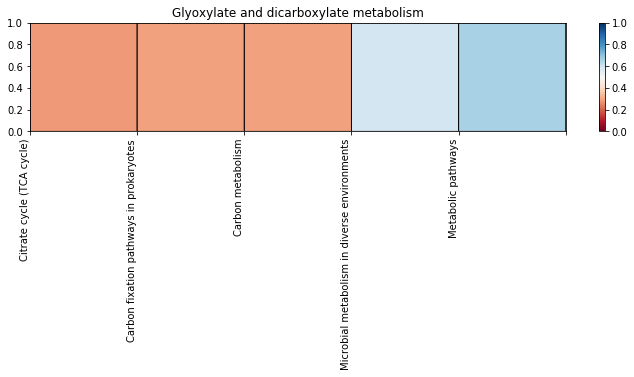

<Figure size 432x288 with 0 Axes>

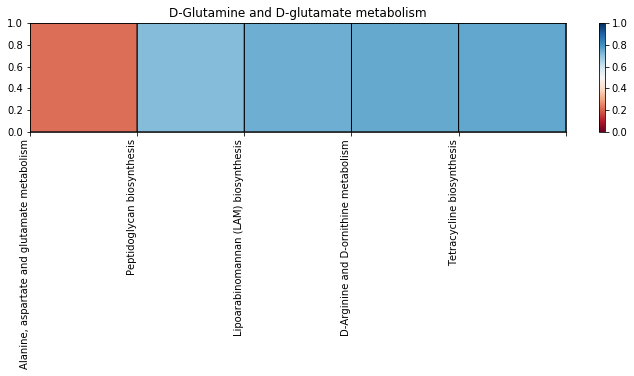

<Figure size 432x288 with 0 Axes>

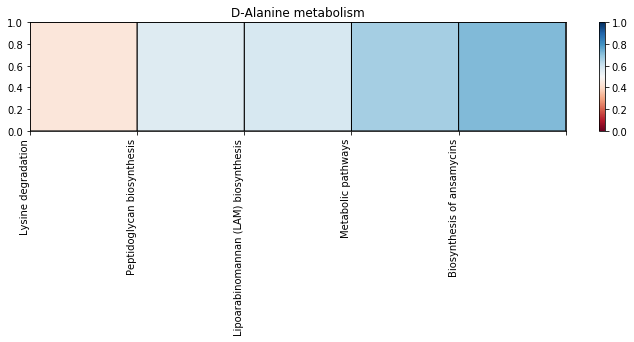

<Figure size 432x288 with 0 Axes>

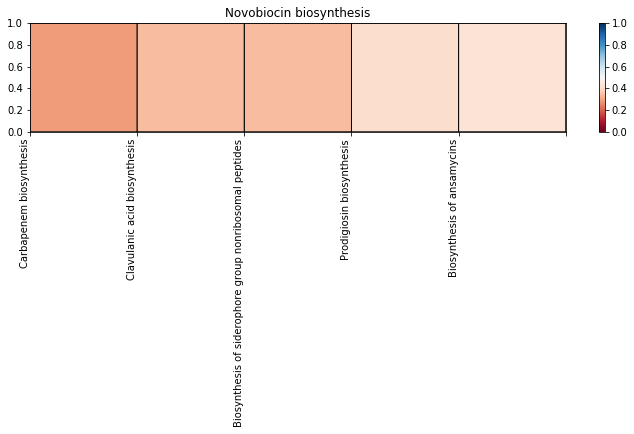

<Figure size 432x288 with 0 Axes>

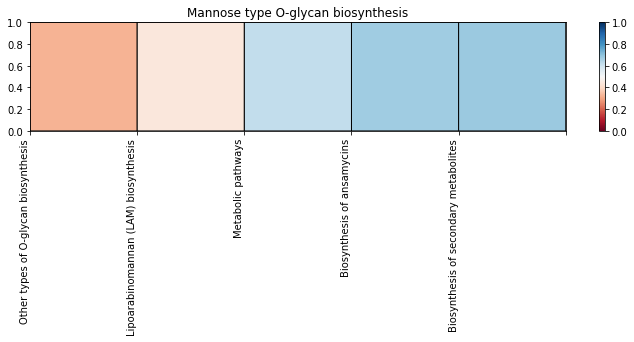

<Figure size 432x288 with 0 Axes>

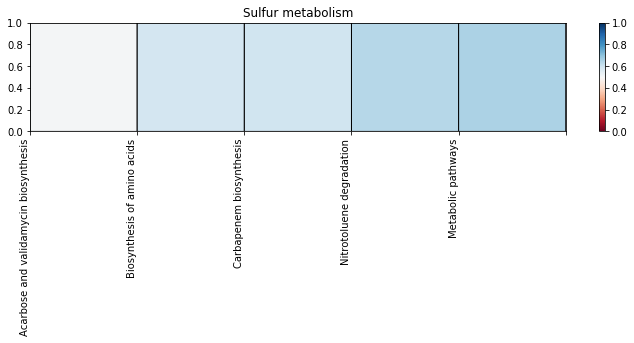

<Figure size 432x288 with 0 Axes>

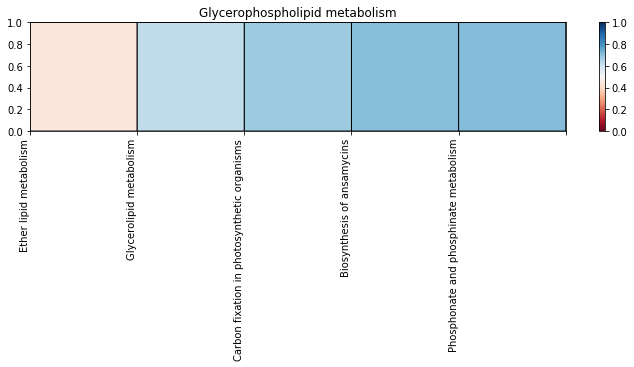

<Figure size 432x288 with 0 Axes>

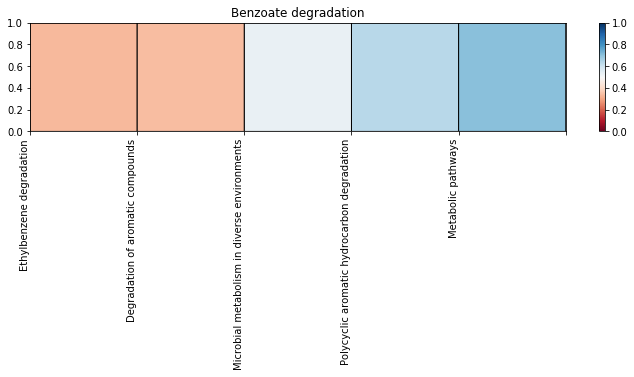

<Figure size 432x288 with 0 Axes>

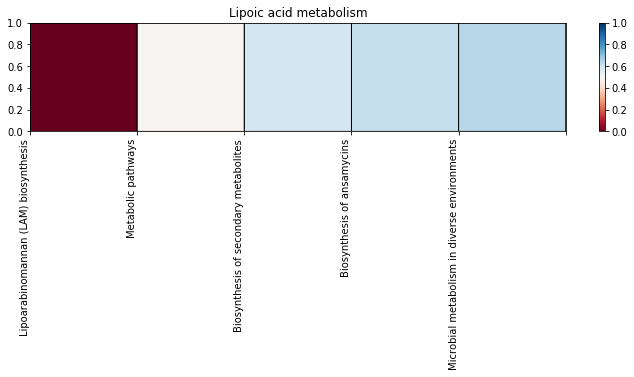

<Figure size 432x288 with 0 Axes>

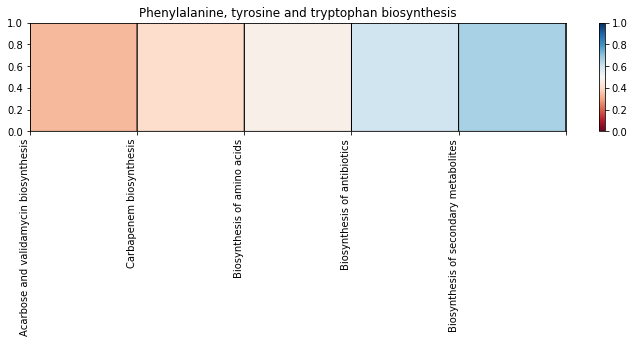

<Figure size 432x288 with 0 Axes>

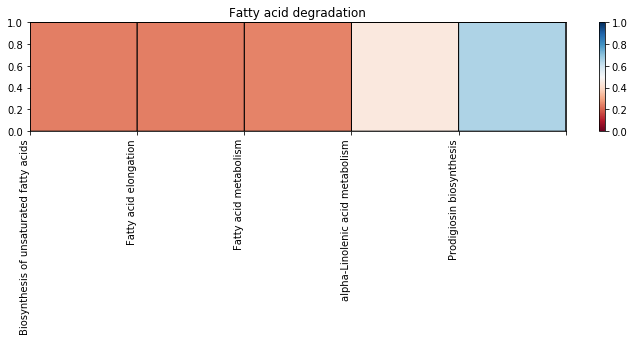

<Figure size 432x288 with 0 Axes>

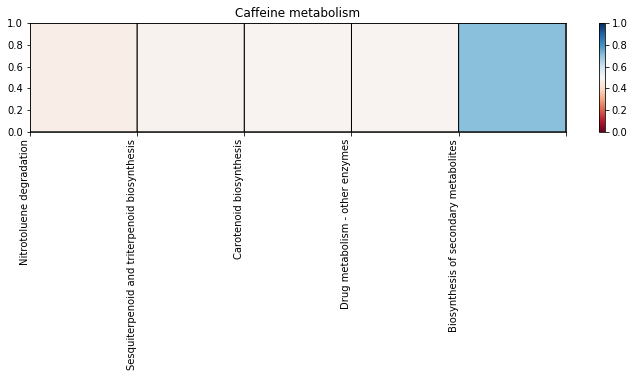

<Figure size 432x288 with 0 Axes>

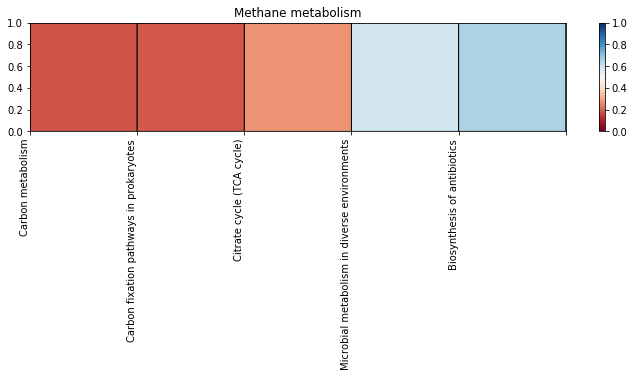

<Figure size 432x288 with 0 Axes>

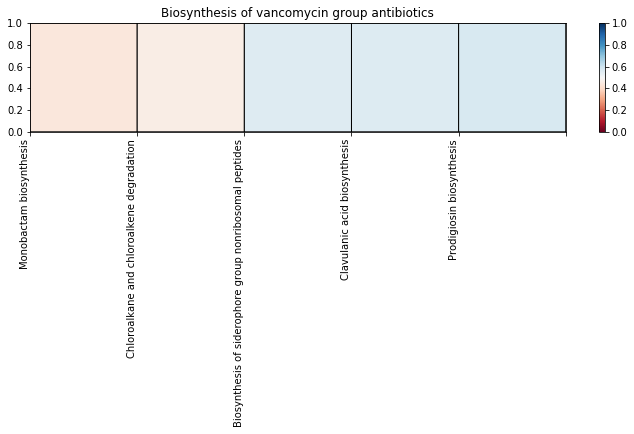

<Figure size 432x288 with 0 Axes>

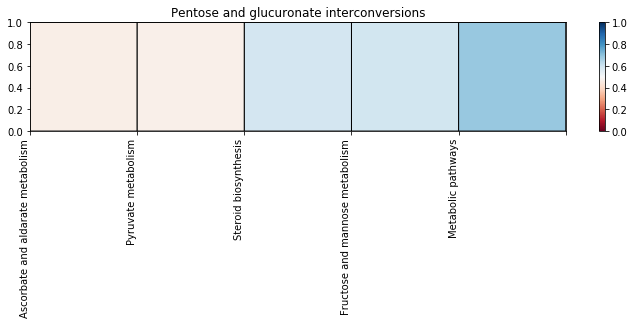

<Figure size 432x288 with 0 Axes>

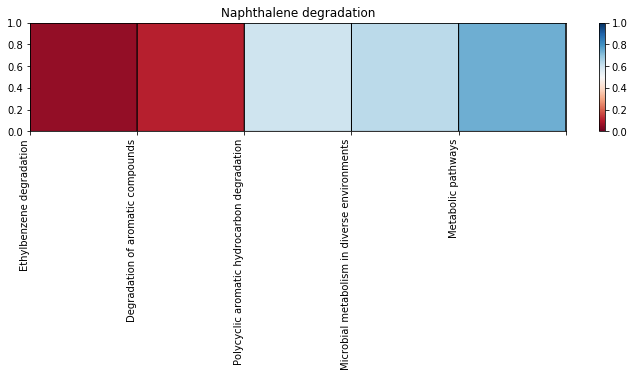

<Figure size 432x288 with 0 Axes>

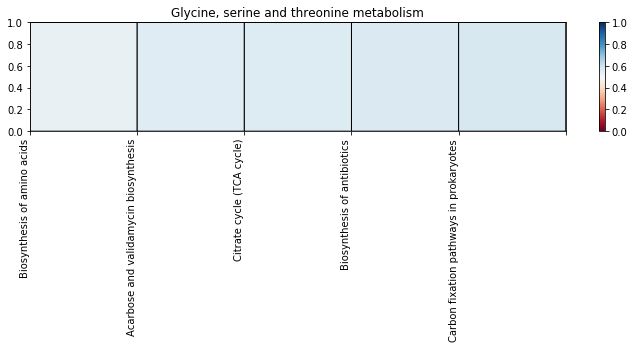

<Figure size 432x288 with 0 Axes>

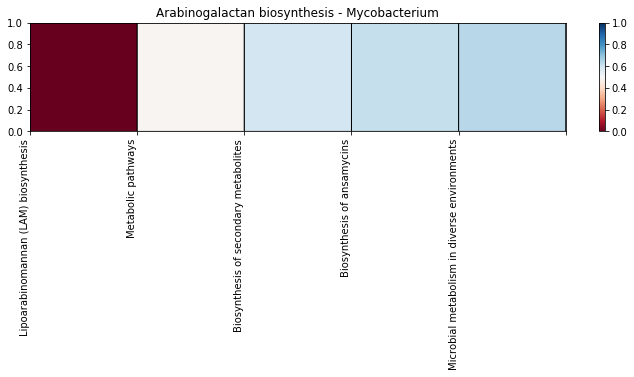

<Figure size 432x288 with 0 Axes>

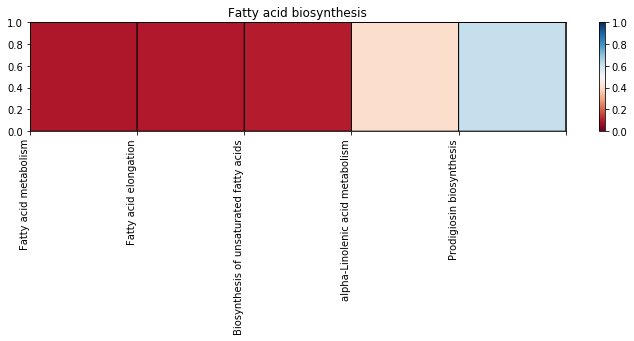

<Figure size 432x288 with 0 Axes>

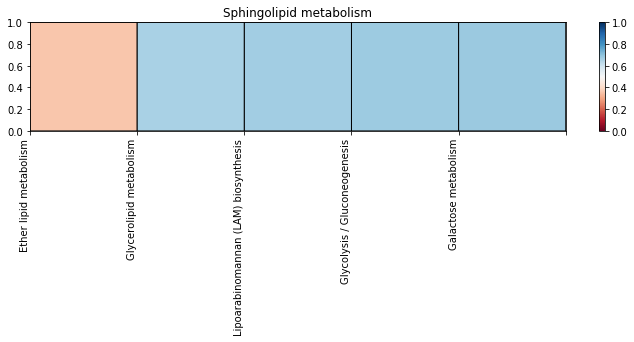

<Figure size 432x288 with 0 Axes>

In [5]:
df_result=Validation().compare_test_train_docs(test_df,train_df,model,dictionary)
Validation().print_heat_map_for_one(df_result,test_df)

## Run FastText similarity based classification to identify similar documents from training set. 
### Parameters for model are based on (a) length of words, (b) size of document and hence window

In [6]:
model_gensim = FT_gensim(size=100)

In [7]:
model_gensim.build_vocab(sentences=train,min_count=1)

In [8]:
print (model_gensim)

FastText(vocab=3423, size=100, alpha=0.025)


In [9]:
model_gensim.train(train, total_examples=len(train), epochs=100,min_n=5,window=200)

In [10]:
model_gensim.most_similar("ec:1.2.3.6",topn=100)

/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ec:1.2.3.7', 0.9971314668655396),
 ('ec:1.2.3.8', 0.9961616396903992),
 ('ec:1.2.3.5', 0.992707371711731),
 ('ec:1.2.3.3', 0.9916452765464783),
 ('ec:1.2.3.1', 0.9545523524284363),
 ('ec:1.2.3.13', 0.9522236585617065),
 ('ec:1.2.99.6', 0.9447554349899292),
 ('ec:1.2.99.8', 0.9423952102661133),
 ('ec:1.21.98.3', 0.9359167814254761),
 ('ec:1.21.98.2', 0.9340643882751465),
 ('ec:1.2.3.14', 0.9338433742523193),
 ('ec:1.21.98.1', 0.9308893084526062),
 ('ec:1.21.3.2', 0.9240912199020386),
 ('ec:1.2.98.1', 0.9225687980651855),
 ('ec:1.21.99.5', 0.9220476150512695),
 ('ec:1.21.3.7', 0.9196481108665466),
 ('ec:1.21.3.8', 0.9160208702087402),
 ('ec:1.2.5.2', 0.9073996543884277),
 ('ec:1.21.3.3', 0.9038360118865967),
 ('ec:1.21.4.5', 0.9032508134841919),
 ('ec:1.8.2.3', 0.8962160348892212),
 ('ec:1.2.4.4', 0.894320011138916),
 ('ec:1.2.4.2', 0.8917560577392578),
 ('ec:1.21.3.1', 0.8801757097244263),
 ('ec:1.8.2.1', 0.8791067600250244),
 ('ec:1.6.2.2', 0.8774998188018799),
 ('ec:1.23.1.4', 0.87

In [11]:
model_gensim.most_similar("ec:1.14.14.38",topn=100)


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ec:1.14.14.36', 0.9996547102928162),
 ('ec:1.14.14.31', 0.999651312828064),
 ('ec:1.14.14.42', 0.9994584321975708),
 ('ec:1.14.14.41', 0.9994503259658813),
 ('ec:1.14.14.43', 0.999441385269165),
 ('ec:1.14.14.39', 0.9994195103645325),
 ('ec:1.14.14.32', 0.9993952512741089),
 ('ec:1.14.14.35', 0.9993903040885925),
 ('ec:1.14.14.37', 0.9992192387580872),
 ('ec:1.14.14.46', 0.999197781085968),
 ('ec:1.14.14.34', 0.9991868734359741),
 ('ec:1.14.14.76', 0.9991405010223389),
 ('ec:1.14.14.60', 0.9990824460983276),
 ('ec:1.14.14.86', 0.9989398717880249),
 ('ec:1.14.14.70', 0.9988746643066406),
 ('ec:1.14.14.47', 0.9988641142845154),
 ('ec:1.14.14.81', 0.9988629817962646),
 ('ec:1.14.14.82', 0.998849630355835),
 ('ec:1.14.14.87', 0.9988264441490173),
 ('ec:1.14.14.45', 0.9988170862197876),
 ('ec:1.14.14.50', 0.9988054037094116),
 ('ec:1.14.14.68', 0.9987455010414124),
 ('ec:1.14.14.88', 0.9987323880195618),
 ('ec:1.14.14.62', 0.998672366142273),
 ('ec:1.14.14.95', 0.9986504316329956),
 ('ec

In [19]:
lst=[]
for i,j in enumerate(test):
    for k,l in enumerate(train):
        sim=model_gensim.n_similarity(test[i], train[k])
        if sim>0:
            lst.append([list(test_dict.keys())[i],list(train_dict.keys())[k],sim,len(test[i]),len(train[k])])
df_sim=pd.DataFrame(lst,columns=['Pathway_test','Pathway_train','Similarity','test length','train length'])


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  after removing the cwd from sys.path.


In [15]:
#del df_sim

df_sim.sort_values(by=['Similarity'])

Pathway_test  \
815                         Fatty acid degradation   
1362  Arabinogalactan biosynthesis - Mycobacterium   
115         D-Glutamine and D-glutamate metabolism   
1117      Pentose and glucuronate interconversions   
1366  Arabinogalactan biosynthesis - Mycobacterium   
...                                            ...   
1177                       Naphthalene degradation   
1158      Pentose and glucuronate interconversions   
1355  Arabinogalactan biosynthesis - Mycobacterium   
1368  Arabinogalactan biosynthesis - Mycobacterium   
1191                       Naphthalene degradation   

                                          Pathway_train  Similarity  \
815           Penicillin and cephalosporin biosynthesis    0.000046   
1362                 Polyketide sugar unit biosynthesis    0.000216   
115                Lipoarabinomannan (LAM) biosynthesis    0.000327   
1117                                 Lysine degradation    0.000478   
1366               Cutin, suberine and wax biosynthesis    0.000617   
...                                                 ...         ...   
1177                                Toluene degradation    0.948333   
1158                  Ascorbate and aldarate metabolism    0.955918   
1355  Glycosphingolipid biosynthesis - lacto and neo...    0.962303   
1368               Other types of O-glycan biosynthesis    0.962412   
1191                  Degradation of aromatic compounds    0.967661   

      test length  train length      TP-FP-FN  
815            34            14   (0, 34, 14)  
1362            4            28    (0, 4, 28)  
115            26             3    (0, 26, 3)  
1117           72            70   (1, 71, 69)  
1366            4             9     (0, 4, 9)  
...           ...           ...           ...  
1177            9            27    (0, 9, 27)  
1158           72            48  (15, 57, 33)  
1355            4            15    (0, 4, 15)  
1368            4            10    (0, 4, 10)  
1191            9           117   (8, 1, 109)  

[1526 rows x 6 columns]

### Similarity value close to 1 suggests more similar documents and 0 is least similar

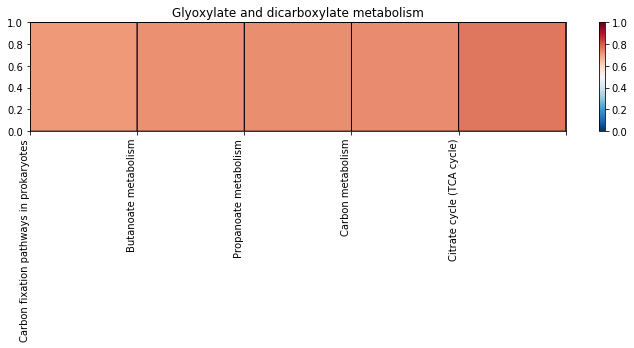

<Figure size 432x288 with 0 Axes>

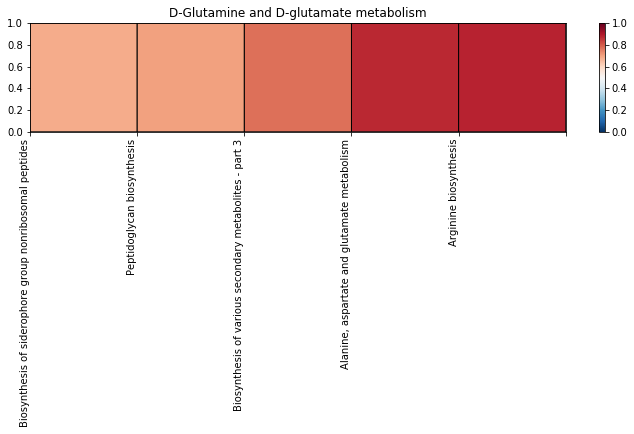

<Figure size 432x288 with 0 Axes>

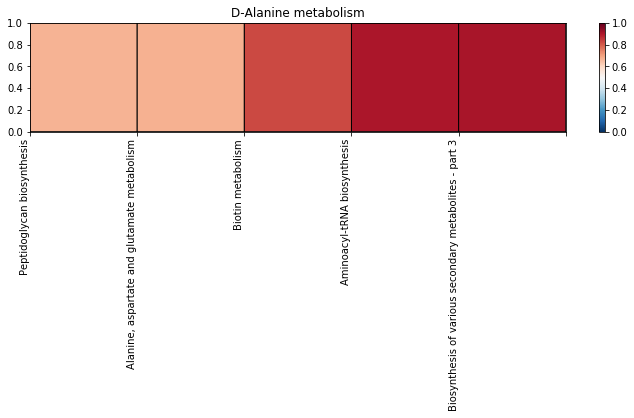

<Figure size 432x288 with 0 Axes>

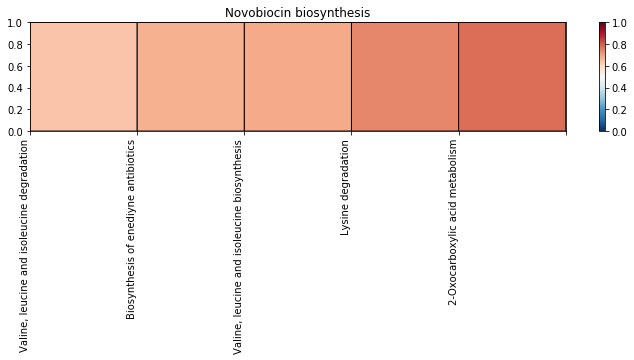

<Figure size 432x288 with 0 Axes>

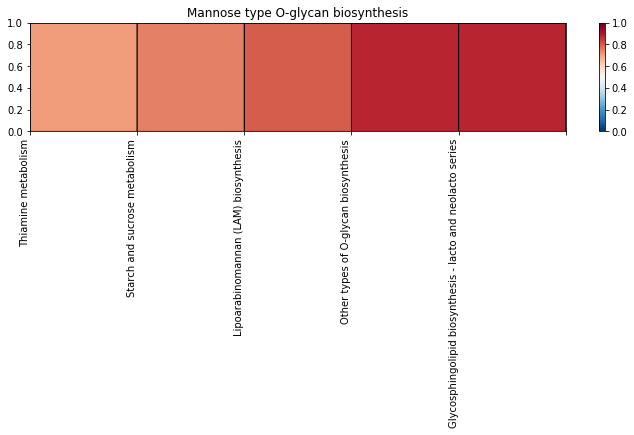

<Figure size 432x288 with 0 Axes>

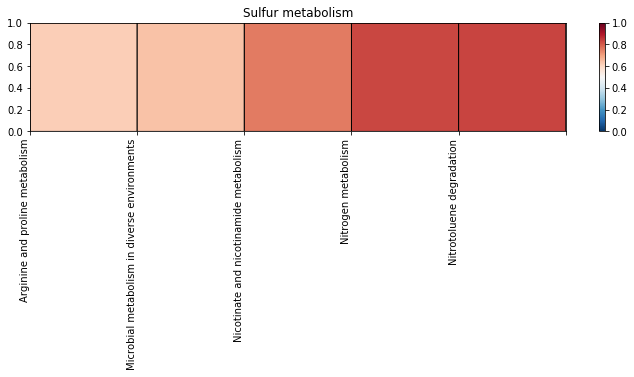

<Figure size 432x288 with 0 Axes>

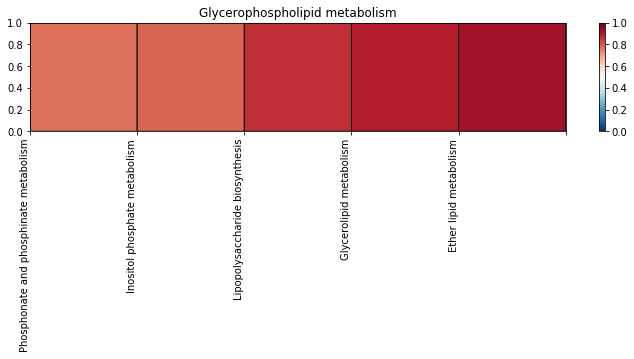

<Figure size 432x288 with 0 Axes>

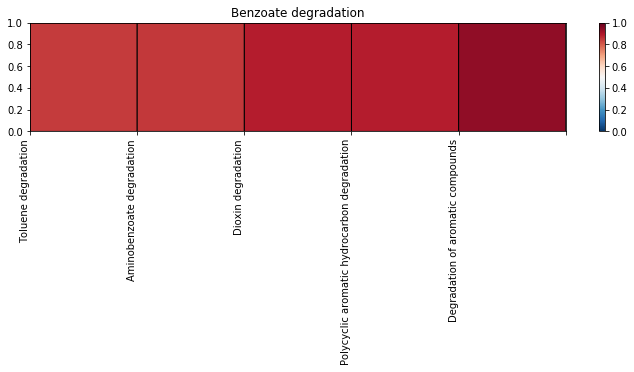

<Figure size 432x288 with 0 Axes>

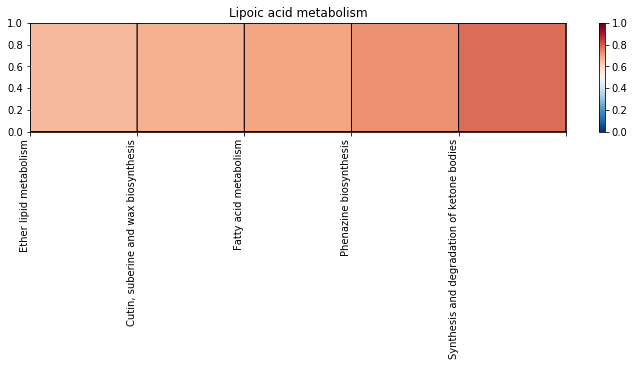

<Figure size 432x288 with 0 Axes>

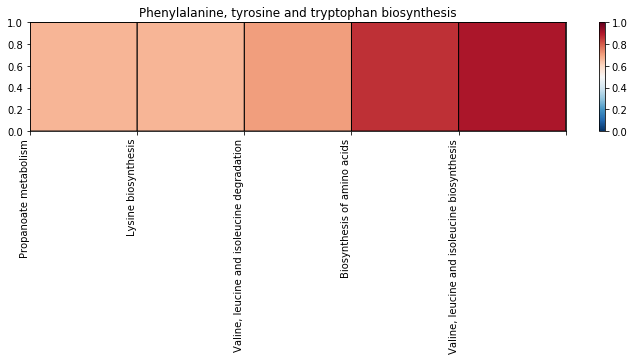

<Figure size 432x288 with 0 Axes>

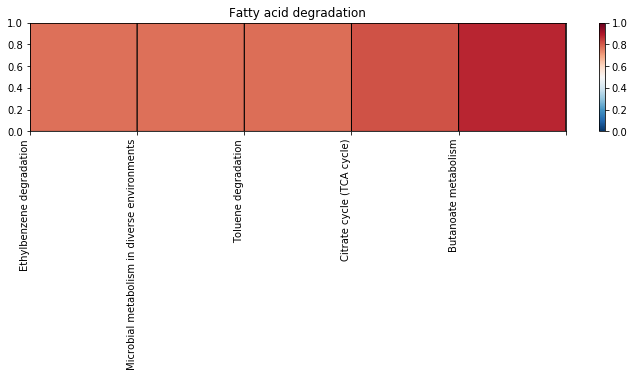

<Figure size 432x288 with 0 Axes>

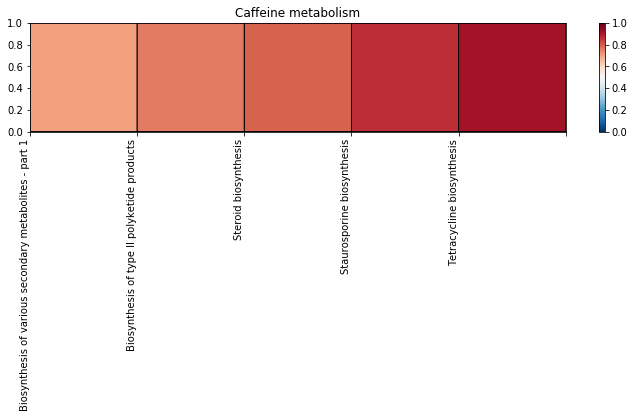

<Figure size 432x288 with 0 Axes>

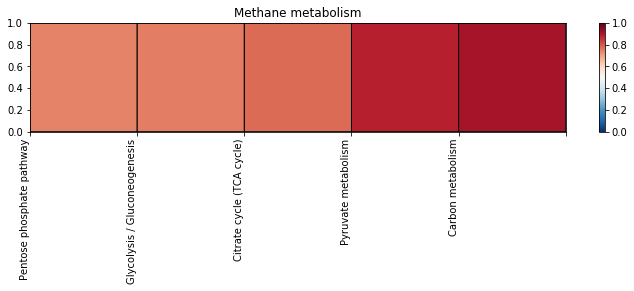

<Figure size 432x288 with 0 Axes>

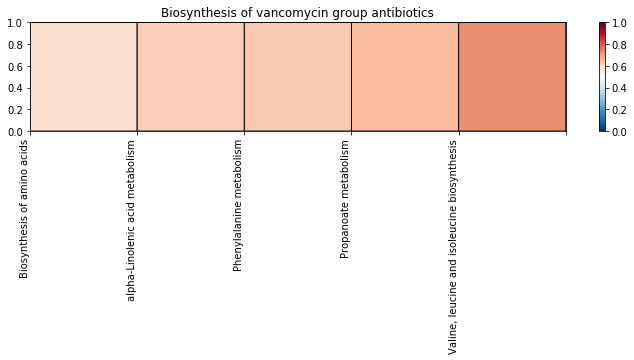

<Figure size 432x288 with 0 Axes>

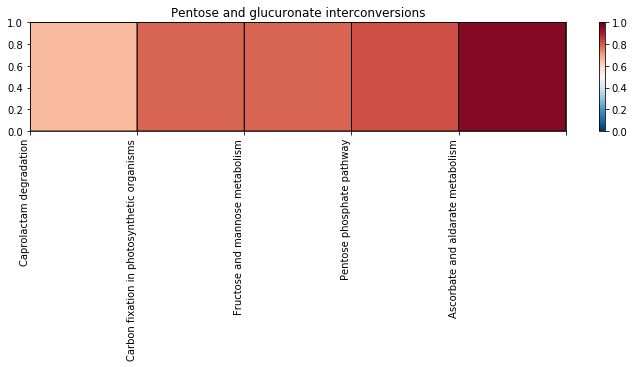

<Figure size 432x288 with 0 Axes>

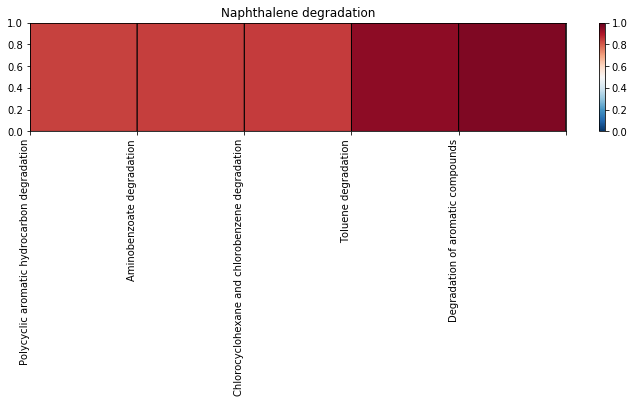

<Figure size 432x288 with 0 Axes>

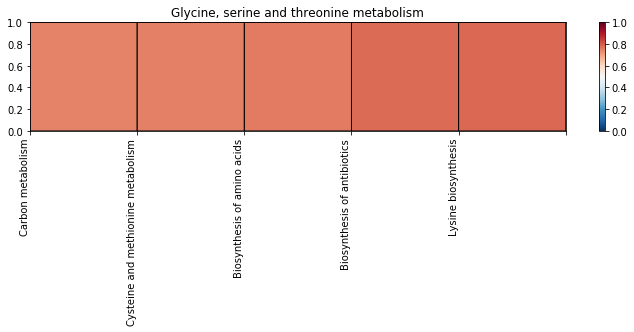

<Figure size 432x288 with 0 Axes>

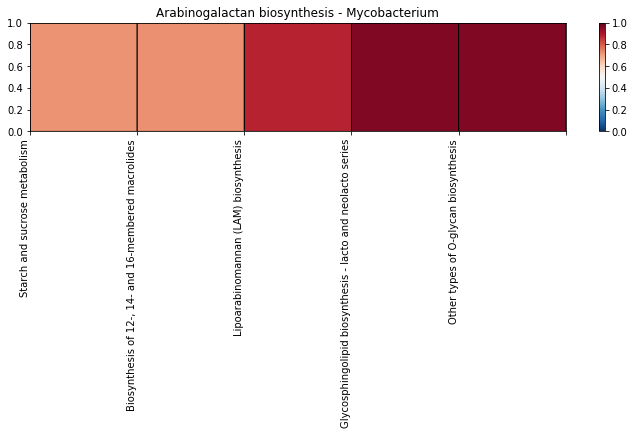

<Figure size 432x288 with 0 Axes>

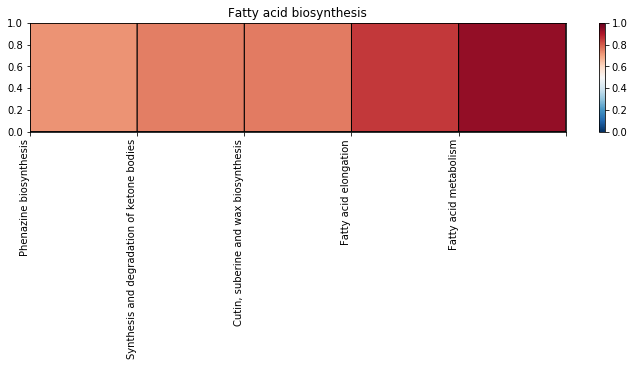

<Figure size 432x288 with 0 Axes>

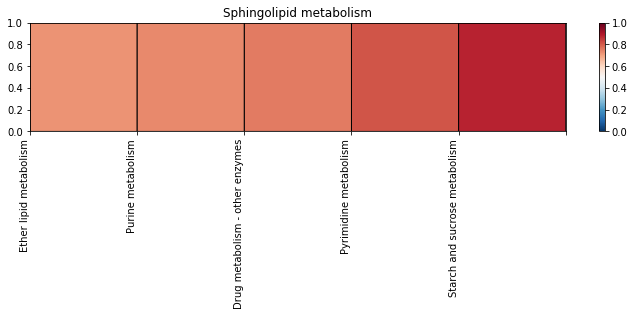

<Figure size 432x288 with 0 Axes>

In [17]:
Validation().print_heat_map_for_one_FT(df_sim,test_df)